In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

import numpy as np

import mne

In [2]:
builtin_montages = mne.channels.get_builtin_montages(descriptions=True)
for montage_name, montage_description in builtin_montages:
    print(f"{montage_name}: {montage_description}")

standard_1005: Electrodes are named and positioned according to the international 10-05 system (343+3 locations)
standard_1020: Electrodes are named and positioned according to the international 10-20 system (94+3 locations)
standard_alphabetic: Electrodes are named with LETTER-NUMBER combinations (A1, B2, F4, …) (65+3 locations)
standard_postfixed: Electrodes are named according to the international 10-20 system using postfixes for intermediate positions (100+3 locations)
standard_prefixed: Electrodes are named according to the international 10-20 system using prefixes for intermediate positions (74+3 locations)
standard_primed: Electrodes are named according to the international 10-20 system using prime marks (' and '') for intermediate positions (100+3 locations)
biosemi16: BioSemi cap with 16 electrodes (16+3 locations)
biosemi32: BioSemi cap with 32 electrodes (32+3 locations)
biosemi64: BioSemi cap with 64 electrodes (64+3 locations)
biosemi128: BioSemi cap with 128 electrodes (1

In [3]:
standard_1020_montage = mne.channels.make_standard_montage("standard_1020")
print(standard_1020_montage)

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 94 channels>


In [ ]:
standard_1020_montage.plot()  # 2D
fig = standard_1020_montage.plot(kind="3d", show=False)  # 3D
fig = fig.gca().view_init(azim=70, elev=15)  # set view angle for tutorial

In [5]:
# Specify the list of channels you want to plot
selected_channels = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz']

# Get the positions of the selected channels
selected_pos = {ch: pos for ch, pos in standard_1020_montage.get_positions()['ch_pos'].items() if ch in selected_channels}

# Create a new montage with the selected channels
selected_montage = mne.channels.make_dig_montage(ch_pos=selected_pos, coord_frame='head')

In [6]:
# Function to plot gridlines in 3D
def plot_gridlines(ax, pos_dict, c, alpha=1):
    def plot_line(channels, style='-', alpha=alpha, c=c):
        points = [pos_dict[channel] for channel in channels if channel in pos_dict]
        if len(points) < 2:
            return
        for i in range(len(points) - 1):
            ax.plot([points[i][0], points[i + 1][0]], [points[i][1], points[i + 1][1]], [points[i][2], points[i + 1][2]], 
                    lw=2, c=c, linestyle=style, alpha=alpha,zorder=2)
            
    # vline = ['Fz', 'Cz', 'CPz', 'Pz', 'POz', 'Oz']
    vline = ['Fz', 'Cz', 'Pz']
    hline = ['T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8']
    circle_line = ['T8', 'F8', 'Fp2', 'Fp1', 'F7', 'FT7', 'T7']
    circle_line2 = ['T8', 'TP8', 'P8', 'PO8', 'O2', 'Oz', 'O1', 'PO7', 'P7', 'TP7', 'T7']
    hline_p = ['P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8']
    hline_cp = ['TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8']
    hline_po = ['PO7', 'PO3', 'POz', 'PO4', 'PO8']
    hline_f = ['F7', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F8']
    hline_ft = ['FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8']
    hline_af = ['AF7', 'AF3', 'AFz', 'AF4', 'AF8']

    plot_line(vline, alpha=alpha, c='mediumpurple')
    plot_line(hline, alpha=alpha, c='seagreen')
    plot_line(circle_line, alpha=alpha)
    plot_line(circle_line2, alpha=alpha)
    plot_line(hline_p, style='--', alpha=0.5 * alpha)
    plot_line(hline_f, style='--', alpha=0.5 * alpha)
    plot_line(hline_cp, style='--', alpha=0.5 * alpha)
    plot_line(hline_po, style='--', alpha=0.5 * alpha)
    plot_line(hline_ft, style='--', alpha=0.5 * alpha)
    plot_line(hline_af, style='--', alpha=0.5 * alpha)

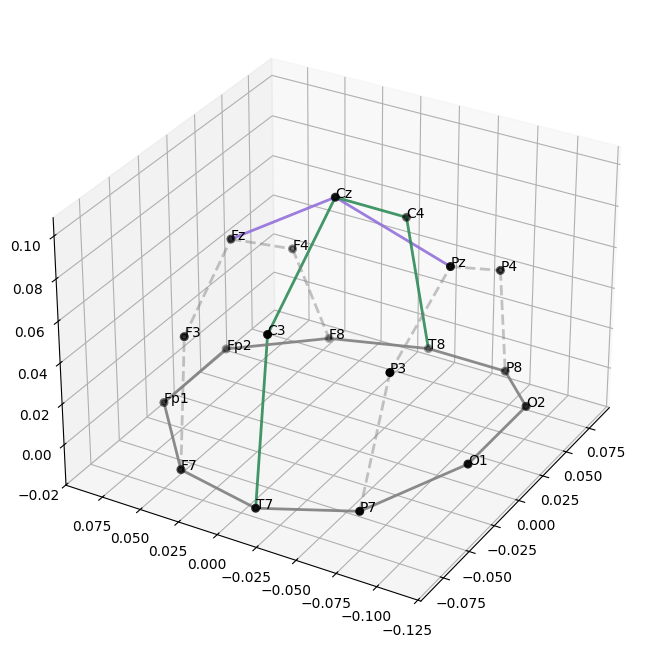

In [7]:

# Specify the list of channels you want to plot
selected_channels = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz']

# Get the positions of the selected channels
selected_pos = {ch: pos for ch, pos in standard_1020_montage.get_positions()['ch_pos'].items() if ch in selected_channels}

# Create a new montage with the selected channels
selected_montage = mne.channels.make_dig_montage(ch_pos=selected_pos, coord_frame='head')

# Plot the selected montage in 3D
fig = selected_montage.plot(kind="3d", show=False)  # 3D plot

# Set view angle
ax = fig.gca()
ax.set_zorder(1)
ax.view_init(azim=210, elev=30)  # set view angle for tutorial

# Remove axis labels
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')

# Plot gridlines
plot_gridlines(ax, selected_pos, c='tab:grey', alpha=0.9)

# Show the plot
plt.show()

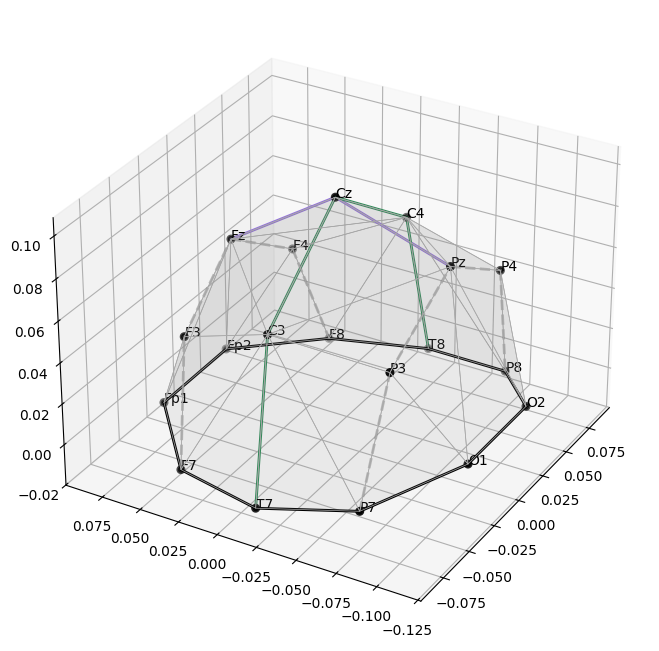

In [15]:
import matplotlib.pyplot as plt
import mne
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Function to plot gridlines in 3D
def plot_gridlines(ax, pos_dict, c, alpha=1):
    def plot_line(channels, style='-', alpha=alpha, c=c):
        points = [pos_dict[channel] for channel in channels if channel in pos_dict]
        if len(points) < 2:
            return
        for i in range(len(points) - 1):
            ax.plot([points[i][0], points[i + 1][0]], [points[i][1], points[i + 1][1]], [points[i][2], points[i + 1][2]], 
                    lw=2, c=c, linestyle=style, alpha=alpha)

    # Define your Poly3DCollection
    ax.add_collection(Poly3DCollection([
        [pos_dict['O1'], pos_dict['O2'], pos_dict['Pz']], 
        [pos_dict['P7'], pos_dict['O1'], pos_dict['P3']], 
        [pos_dict['O1'], pos_dict['P3'], pos_dict['Pz']], 
        [pos_dict['P8'], pos_dict['O2'], pos_dict['P4']], 
        [pos_dict['O2'], pos_dict['P4'], pos_dict['Pz']],
        [pos_dict['T7'], pos_dict['P7'], pos_dict['C3']], 
        [pos_dict['P3'], pos_dict['P7'], pos_dict['C3']], 
        [pos_dict['C3'], pos_dict['P3'], pos_dict['Pz']], 
        [pos_dict['C3'], pos_dict['Pz'], pos_dict['Cz']],
        [pos_dict['T8'], pos_dict['P8'], pos_dict['C4']], 
        [pos_dict['P4'], pos_dict['P8'], pos_dict['C4']], 
        [pos_dict['C4'], pos_dict['P4'], pos_dict['Pz']], 
        [pos_dict['C4'], pos_dict['Pz'], pos_dict['Cz']],
        [pos_dict['T7'], pos_dict['F7'], pos_dict['C3']], 
        [pos_dict['F7'], pos_dict['F3'], pos_dict['C3']], 
        [pos_dict['F3'], pos_dict['Fz'], pos_dict['C3']], 
        [pos_dict['C3'], pos_dict['Cz'], pos_dict['Fz']],
        [pos_dict['T8'], pos_dict['F8'], pos_dict['C4']], 
        [pos_dict['F8'], pos_dict['F4'], pos_dict['C4']], 
        [pos_dict['F4'], pos_dict['Fz'], pos_dict['C4']], 
        [pos_dict['C4'], pos_dict['Cz'], pos_dict['Fz']],
        [pos_dict['F7'], pos_dict['F3'], pos_dict['Fp1']], 
        [pos_dict['F3'], pos_dict['Fp1'], pos_dict['Fz']], 
        [pos_dict['F8'], pos_dict['F4'], pos_dict['Fp2']], 
        [pos_dict['F4'], pos_dict['Fp2'], pos_dict['Fz']], 
        [pos_dict['Fp1'], pos_dict['Fz'], pos_dict['Fp2']],
    ], 
    facecolors='grey', edgecolors='darkgrey', linewidths=0.5, alpha=0.1))

    plot_line(['Fz', 'Cz', 'Pz'], alpha=alpha, c='mediumpurple')
    plot_line(['T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8'], alpha=alpha, c='seagreen')
    plot_line(['T8', 'F8', 'Fp2', 'Fp1', 'F7', 'FT7', 'T7'], alpha=alpha, c='black')
    plot_line(['T8', 'TP8', 'P8', 'PO8', 'O2', 'Oz', 'O1', 'PO7', 'P7', 'TP7', 'T7'], alpha=alpha, c='black')
    plot_line(['P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8'], style='--', alpha=0.5 * alpha)
    plot_line(['F7', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F8'], style='--', alpha=0.5 * alpha)
    plot_line(['TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8'], style='--', alpha=0.5 * alpha)
    plot_line(['PO7', 'PO3', 'POz', 'PO4', 'PO8'], style='--', alpha=0.5 * alpha)
    plot_line(['FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8'], style='--', alpha=0.5 * alpha)
    plot_line(['AF7', 'AF3', 'AFz', 'AF4', 'AF8'], style='--', alpha=0.5 * alpha)

# Specify the list of channels you want to plot
selected_channels = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz']

# Get the positions of the selected channels
standard_1020_montage = mne.channels.make_standard_montage('standard_1020')
selected_pos = {ch: pos for ch, pos in standard_1020_montage.get_positions()['ch_pos'].items() if ch in selected_channels}

# Create a new montage with the selected channels
selected_montage = mne.channels.make_dig_montage(ch_pos=selected_pos, coord_frame='head')

# Plot the selected montage in 3D
fig = selected_montage.plot(kind="3d", show=False)  # 3D plot

# Set view angle
ax = fig.gca()
ax.view_init(azim=210, elev=30)  # set view angle for tutorial

# Remove axis labels
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')

# Plot gridlines
plot_gridlines(ax, selected_pos, c='tab:grey', alpha=1)

# Show the plot
plt.show()

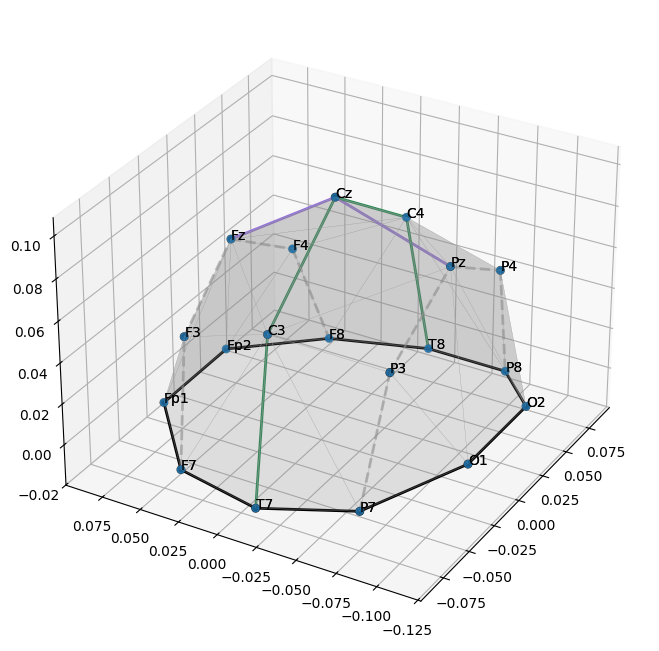

In [66]:
import matplotlib.pyplot as plt
import mne
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Function to plot gridlines in 3D
def plot_gridlines(ax, pos_dict, c, alpha=1):
    def plot_line(channels, style='-', alpha=alpha, c=c):
        points = [pos_dict[channel] for channel in channels if channel in pos_dict]
        if len(points) < 2:
            return
        for i in range(len(points) - 1):
            ax.plot([points[i][0], points[i + 1][0]], [points[i][1], points[i + 1][1]], [points[i][2], points[i + 1][2]], 
                    lw=2, c=c, linestyle=style, alpha=alpha)

    plot_line(['Fz', 'Cz', 'Pz'], alpha=alpha, c='mediumpurple')
    plot_line(['T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8'], alpha=alpha, c='seagreen')
    plot_line(['T8', 'F8', 'Fp2', 'Fp1', 'F7', 'FT7', 'T7'], alpha=alpha, c='black')
    plot_line(['T8', 'TP8', 'P8', 'PO8', 'O2', 'Oz', 'O1', 'PO7', 'P7', 'TP7', 'T7'], alpha=alpha, c='black')
    plot_line(['P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8'], style='--', alpha=0.5 * alpha)
    plot_line(['F7', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F8'], style='--', alpha=0.5 * alpha)
    plot_line(['TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8'], style='--', alpha=0.5 * alpha)
    plot_line(['PO7', 'PO3', 'POz', 'PO4', 'PO8'], style='--', alpha=0.5 * alpha)
    plot_line(['FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8'], style='--', alpha=0.5 * alpha)
    plot_line(['AF7', 'AF3', 'AFz', 'AF4', 'AF8'], style='--', alpha=0.5 * alpha)

    # Plot the Poly3DCollection (montage) at last
    ax.add_collection(Poly3DCollection([
        [pos_dict['O1'], pos_dict['O2'], pos_dict['Pz']], 
        [pos_dict['P7'], pos_dict['O1'], pos_dict['P3']], 
        [pos_dict['O1'], pos_dict['P3'], pos_dict['Pz']], 
        [pos_dict['P8'], pos_dict['O2'], pos_dict['P4']], 
        [pos_dict['O2'], pos_dict['P4'], pos_dict['Pz']],
        [pos_dict['T7'], pos_dict['P7'], pos_dict['C3']], 
        [pos_dict['P3'], pos_dict['P7'], pos_dict['C3']], 
        [pos_dict['C3'], pos_dict['P3'], pos_dict['Pz']], 
        [pos_dict['C3'], pos_dict['Pz'], pos_dict['Cz']],
        [pos_dict['T8'], pos_dict['P8'], pos_dict['C4']], 
        [pos_dict['P4'], pos_dict['P8'], pos_dict['C4']], 
        [pos_dict['C4'], pos_dict['P4'], pos_dict['Pz']], 
        [pos_dict['C4'], pos_dict['Pz'], pos_dict['Cz']],
        [pos_dict['T7'], pos_dict['F7'], pos_dict['C3']], 
        [pos_dict['F7'], pos_dict['F3'], pos_dict['C3']], 
        [pos_dict['F3'], pos_dict['Fz'], pos_dict['C3']], 
        [pos_dict['C3'], pos_dict['Cz'], pos_dict['Fz']],
        [pos_dict['T8'], pos_dict['F8'], pos_dict['C4']], 
        [pos_dict['F8'], pos_dict['F4'], pos_dict['C4']], 
        [pos_dict['F4'], pos_dict['Fz'], pos_dict['C4']], 
        [pos_dict['C4'], pos_dict['Cz'], pos_dict['Fz']],
        [pos_dict['F7'], pos_dict['F3'], pos_dict['Fp1']], 
        [pos_dict['F3'], pos_dict['Fp1'], pos_dict['Fz']], 
        [pos_dict['F8'], pos_dict['F4'], pos_dict['Fp2']], 
        [pos_dict['F4'], pos_dict['Fp2'], pos_dict['Fz']], 
        [pos_dict['Fp1'], pos_dict['Fz'], pos_dict['Fp2']],
    ], 
    facecolors='grey', edgecolors='darkgrey', linewidths=0.15, alpha=0.2))

# Specify the list of channels you want to plot
selected_channels = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz']

# Get the positions of the selected channels
standard_1020_montage = mne.channels.make_standard_montage('standard_1020')
selected_pos = {ch: pos for ch, pos in standard_1020_montage.get_positions()['ch_pos'].items() if ch in selected_channels}

# Create a new montage with the selected channels
selected_montage = mne.channels.make_dig_montage(ch_pos=selected_pos, coord_frame='head')

# Plot the selected montage in 3D
fig = selected_montage.plot(kind="3d", show=False)  # 3D plot

# Set view angle
ax = fig.gca()
ax.view_init(azim=210, elev=30)  # set view angle for tutorial

# Remove axis labels
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')

# ax.get_zaxis().set_ticks([])

# Plot gridlines
plot_gridlines(ax, selected_pos, c='tab:grey', alpha=1)

positions = np.array([selected_pos[ch] for ch in selected_channels])
ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], color='tab:blue', s=25, alpha=0.75)
for i, txt in enumerate(selected_channels):
    # print(i, txt)
    # ax.annotate(txt, (positions[i, 0], positions[i, 1], positions[i, 2]))
    ax.text(positions[i, 0], positions[i, 1], positions[i, 2], txt, zorder=10)

# Show the plot
plt.show()


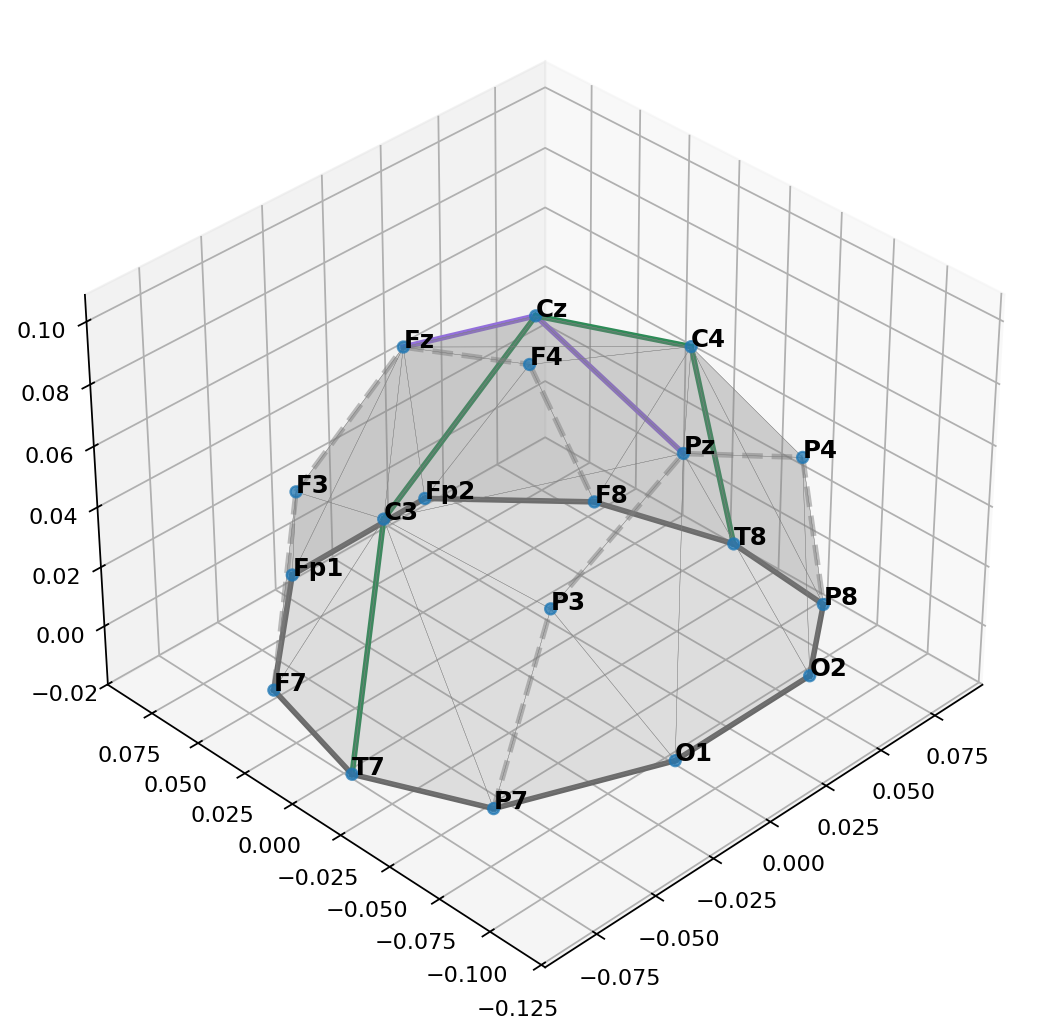

In [2]:
import matplotlib.pyplot as plt
import mne
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

# Function to plot gridlines in 3D
def plot_gridlines(ax, pos_dict, c, alpha=1):
    def plot_line(channels, style='-', alpha=alpha, c=c):
        points = [pos_dict[channel] for channel in channels if channel in pos_dict]
        if len(points) < 2:
            return
        for i in range(len(points) - 1):
            ax.plot([points[i][0], points[i + 1][0]], [points[i][1], points[i + 1][1]], [points[i][2], points[i + 1][2]], 
                    lw=2.5, c=c, linestyle=style, alpha=alpha)

    plot_line(['Fz', 'Cz', 'Pz'], alpha=alpha, c='mediumpurple')
    plot_line(['T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8'], alpha=alpha, c='seagreen')
    plot_line(['T8', 'F8', 'Fp2', 'Fp1', 'F7', 'FT7', 'T7'], alpha=alpha, c='dimgrey')
    plot_line(['T8', 'TP8', 'P8', 'PO8', 'O2', 'Oz', 'O1', 'PO7', 'P7', 'TP7', 'T7'], alpha=alpha, c='dimgrey')
    plot_line(['P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8'], style='--', alpha=0.5 * alpha)
    plot_line(['F7', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F8'], style='--', alpha=0.5 * alpha)
    plot_line(['TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8'], style='--', alpha=0.5 * alpha)
    plot_line(['PO7', 'PO3', 'POz', 'PO4', 'PO8'], style='--', alpha=0.5 * alpha)
    plot_line(['FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8'], style='--', alpha=0.5 * alpha)
    plot_line(['AF7', 'AF3', 'AFz', 'AF4', 'AF8'], style='--', alpha=0.5 * alpha)

# Specify the list of channels you want to plot
selected_channels = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz']

# Get the positions of the selected channels
standard_1020_montage = mne.channels.make_standard_montage('standard_1020')
selected_pos = {ch: pos for ch, pos in standard_1020_montage.get_positions()['ch_pos'].items() if ch in selected_channels}

# Create a new montage with the selected channels
selected_montage = mne.channels.make_dig_montage(ch_pos=selected_pos, coord_frame='head')

# Plot the selected montage in 3D
fig = plt.figure(figsize=(12, 8), dpi=160)
ax = fig.add_subplot(111, projection='3d')

# Plot gridlines
plot_gridlines(ax, selected_pos, c='tab:grey', alpha=1)

# Plot the Poly3DCollection (montage) at last
ax.add_collection(Poly3DCollection([
    [selected_pos['O1'], selected_pos['O2'], selected_pos['Pz']], 
    [selected_pos['P7'], selected_pos['O1'], selected_pos['P3']], 
    [selected_pos['O1'], selected_pos['P3'], selected_pos['Pz']], 
    [selected_pos['P8'], selected_pos['O2'], selected_pos['P4']], 
    [selected_pos['O2'], selected_pos['P4'], selected_pos['Pz']],
    [selected_pos['T7'], selected_pos['P7'], selected_pos['C3']], 
    [selected_pos['P3'], selected_pos['P7'], selected_pos['C3']], 
    [selected_pos['C3'], selected_pos['P3'], selected_pos['Pz']], 
    [selected_pos['C3'], selected_pos['Pz'], selected_pos['Cz']],
    [selected_pos['T8'], selected_pos['P8'], selected_pos['C4']], 
    [selected_pos['P4'], selected_pos['P8'], selected_pos['C4']], 
    [selected_pos['C4'], selected_pos['P4'], selected_pos['Pz']], 
    [selected_pos['C4'], selected_pos['Pz'], selected_pos['Cz']],
    [selected_pos['T7'], selected_pos['F7'], selected_pos['C3']], 
    [selected_pos['F7'], selected_pos['F3'], selected_pos['C3']], 
    [selected_pos['F3'], selected_pos['Fz'], selected_pos['C3']], 
    [selected_pos['C3'], selected_pos['Cz'], selected_pos['Fz']],
    [selected_pos['T8'], selected_pos['F8'], selected_pos['C4']], 
    [selected_pos['F8'], selected_pos['F4'], selected_pos['C4']], 
    [selected_pos['F4'], selected_pos['Fz'], selected_pos['C4']], 
    [selected_pos['C4'], selected_pos['Cz'], selected_pos['Fz']],
    [selected_pos['F7'], selected_pos['F3'], selected_pos['Fp1']], 
    [selected_pos['F3'], selected_pos['Fp1'], selected_pos['Fz']], 
    [selected_pos['F8'], selected_pos['F4'], selected_pos['Fp2']], 
    [selected_pos['F4'], selected_pos['Fp2'], selected_pos['Fz']], 
    [selected_pos['Fp1'], selected_pos['Fz'], selected_pos['Fp2']],
], 
facecolors='grey', edgecolors='grey', linewidths=0.15, alpha=0.2))

positions = np.array([selected_pos[ch] for ch in selected_channels])
ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], color='tab:blue', s=25, alpha=0.75)
for i, txt in enumerate(selected_channels):
    # print(i, txt)
    # ax.annotate(txt, (positions[i, 0], positions[i, 1], positions[i, 2]))
    ax.text(positions[i, 0], positions[i, 1], positions[i, 2], txt, zorder=10, fontsize=11, fontweight='bold')

# Set view angle
ax.view_init(azim=225, elev=35)  # set view angle for tutorial

# Remove axis labels
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')

# Show the plot
plt.show()


In [3]:
import os

import torch
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

import mne

In [4]:
fontsize = 16
markersize = 7

root = "/home/oturgut/Documents/Paper/NeurIPS2024/Figures/scripts"

def load_eeg_pretrain(model: str = 'base'):
    eeg_channel_names = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 
                         'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz']
    y, X = torch.load(os.path.join(root, f'./{model}Deep_pos_embed_y.pt'))
    X = X[1:]
    eeg_index = y['eeg_10-20']
    X = X[eeg_index:eeg_index+19].numpy()

    return X, eeg_channel_names

def load_eeg_finetune(multi: bool = False):
    eeg_channel_names = ['F3', 'F4', 'FC5', 'C3', 'C4', 'CP5', 'P3', 'Pz', 'P4', 'P8', 'Oz', 
                         'O2', 'AF3', 'AF4', 'F1', 'F2', 'FT7', 'C5', 'C1', 'C2', 'C6', 'CP3', 
                         'CPz', 'TP8', 'P5', 'P1', 'P2', 'P6', 'PO3', 'POz', 'PO4', 'PO8']
    multi_name = 'multi' if multi else 'single'
    y, X = torch.load(os.path.join(root, f'./baseDeep_{multi_name}_pos_embed_y.pt'))
    X = X[1:].numpy()  # remove pad token

    return X, eeg_channel_names


def channel_dict(X, channel_names):
    return {name: X[i] for i, name in enumerate(channel_names)}


def project_to_channels(X, channel_names, is_3d=True):
    montages = mne.channels.make_standard_montage('standard_1020')
    pos_dict = montages.get_positions()['ch_pos']
    gt_pos = np.stack([pos_dict[channel] for channel in channel_names])

    pca = PCA(n_components=3 if is_3d else 2)
    components = pca.fit_transform(X)
    print('expl variance:', pca.explained_variance_ratio_)
    lr = LinearRegression(fit_intercept=True)
    lr.fit(components, gt_pos)
    positions = lr.predict(components)
    r2 = lr.score(components, gt_pos)
    print('R^2:', r2)
    return positions, gt_pos, r2


def plot_gridlines(ax, pos_dict, c, alpha=1):
    def plot_line(channels, style='-', alpha=alpha):
        points = [pos_dict[channel] for channel in channels if channel in pos_dict]
        if len(points) < 2:
            return
        for i in range(len(points) - 1):
            ax.add_line(Line2D([points[i][0], points[i + 1][0]], [points[i][1], points[i + 1][1]], 
                            lw=2, c=c, linestyle=style, alpha=alpha))
            
    vline = ['Fz', 'Cz', 'CPz', 'Pz', 'POz', 'Oz']
    hline = ['T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8']
    circle_line = ['T8', 'F8', 'Fp2', 'Fp1', 'F7', 'FT7', 'T7']
    circle_line2 = ['T8', 'TP8', 'P8', 'PO8', 'O2', 'Oz', 'O1', 'PO7', 'P7', 'TP7', 'T7']
    hline_p = ['P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8']
    hline_cp = ['TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8']
    hline_po = ['PO7', 'PO3', 'POz', 'PO4', 'PO8']
    hline_f = ['F7', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F8']
    hline_ft = ['FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8']
    hline_af = ['AF7', 'AF3', 'AFz', 'AF4', 'AF8']

    plot_line(vline, alpha=alpha)
    plot_line(hline, alpha=alpha)
    plot_line(circle_line, alpha=alpha)
    plot_line(circle_line2, alpha=alpha)
    plot_line(hline_p, style='--', alpha=0.7 * alpha)
    plot_line(hline_f, style='--', alpha=0.7 * alpha)
    plot_line(hline_cp, style='--', alpha=0.7 * alpha)
    plot_line(hline_po, style='--', alpha=0.7 * alpha)
    plot_line(hline_ft, style='--', alpha=0.7 * alpha)
    plot_line(hline_af, style='--', alpha=0.7 * alpha)
    

def plot_gt_points(ax, gt_pos_list, channel_names_list, annotate=True):
    allpos_dict = {}
    for gt_pos, channel_names in zip(gt_pos_list, channel_names_list):
        allpos_dict.update(channel_dict(gt_pos, channel_names))

    all_pos = np.stack(list(allpos_dict.values()))

    ax.plot(all_pos[:, 0], all_pos[:, 1], 'o', c='tab:grey', alpha=0.35, label="true", fillstyle="none", markersize=markersize)
    if annotate:
        for i, txt in enumerate(allpos_dict.keys()):
            ax.annotate(txt, (all_pos[i, 0] + 0.002, all_pos[i, 1] - 0.0012), c='tab:grey', alpha=0.5, fontsize=fontsize)

    plot_gridlines(ax, allpos_dict, 'tab:grey', alpha=0.35)


def plot_points_with_offset(ax, pos, gt_pos, channel_names, c, arrows=True, lines=True, y_offset=0.0):
    ax.plot(pos[:, 0], pos[:, 1], 'o', c=c, alpha=0.75, label="learned", fillstyle="full", markersize=markersize)

    for p, gt_p, ch in zip(pos, gt_pos, channel_names):
        offset = gt_p - p
        ax.annotate(ch, (p[0] + 0.002, p[1] + y_offset), c=c, fontsize=fontsize, fontweight='bold')
        if arrows:
            ax.arrow(p[0], p[1], offset[0], offset[1], 
                linestyle='dashed', linewidth=0.05,
                length_includes_head=True, facecolor=c, edgecolor=c)
    if lines:
        plot_gridlines(ax, channel_dict(pos, channel_names), c, alpha=0.35)


def plot_relative_offsets(ax, pos_1, pos_2, channels1, channels2, c):
    union_channels = list(set(channels1) & set(channels2))
    pos_1 = np.stack([pos_1[channels1.index(channel)] for channel in union_channels])
    pos_2 = np.stack([pos_2[channels2.index(channel)] for channel in union_channels])

    for p1, p2 in zip(pos_1, pos_2):
        ax.add_line(Line2D([p1[0], p2[0]], [p1[1], p2[1]], lw=2, c=c, linestyle='dashed', alpha=0.5))


X_eeg_1, eeg_channel_names_1 = load_eeg_pretrain('base')
pos_1, gt_pos_1, r2_1 = project_to_channels(X_eeg_1, eeg_channel_names_1, is_3d=True)

X_eeg_2, eeg_channel_names_2 = load_eeg_finetune(multi=True)
pos_2, gt_pos_2, r2_2 = project_to_channels(X_eeg_2, eeg_channel_names_2, is_3d=True)

expl variance: [0.32905823 0.25031048 0.16752346]
R^2: 0.8077183045789167
expl variance: [0.3919073  0.32972088 0.1570388 ]
R^2: 0.949359339781568


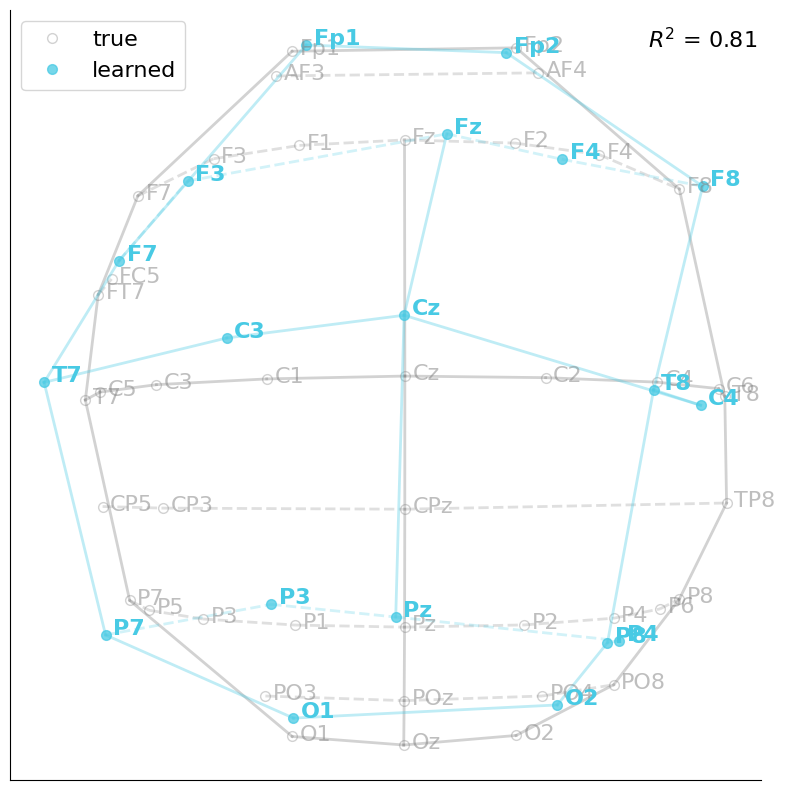

In [8]:
fig, axs = plt.subplots(1, 1, figsize=(8, 8))

plot_gt_points(axs, [gt_pos_1, gt_pos_2], [eeg_channel_names_1, eeg_channel_names_2])
plot_points_with_offset(axs, pos_1, gt_pos_1, eeg_channel_names_1, '#48cae4', arrows=False) #fb6f92
axs.text(0.85, 0.95, r'${R^2}$ = ' + f'{r2_1:.2f}', transform=axs.transAxes, fontsize=16)
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
# axs.spines['left'].set_visible(False)
# axs.spines['bottom'].set_visible(False)
axs.legend(loc='upper left', fontsize=16)
# axs.set_xticklabels([])
# axs.set_yticklabels([])

axs.set_xticks([])
axs.set_yticks([])

fig.tight_layout()
plt.savefig('../figures/eeg_coords_2D_pretraining.pdf')
plt.savefig('../figures/eeg_coords_2D_pretraining.png', dpi=160)
plt.show()

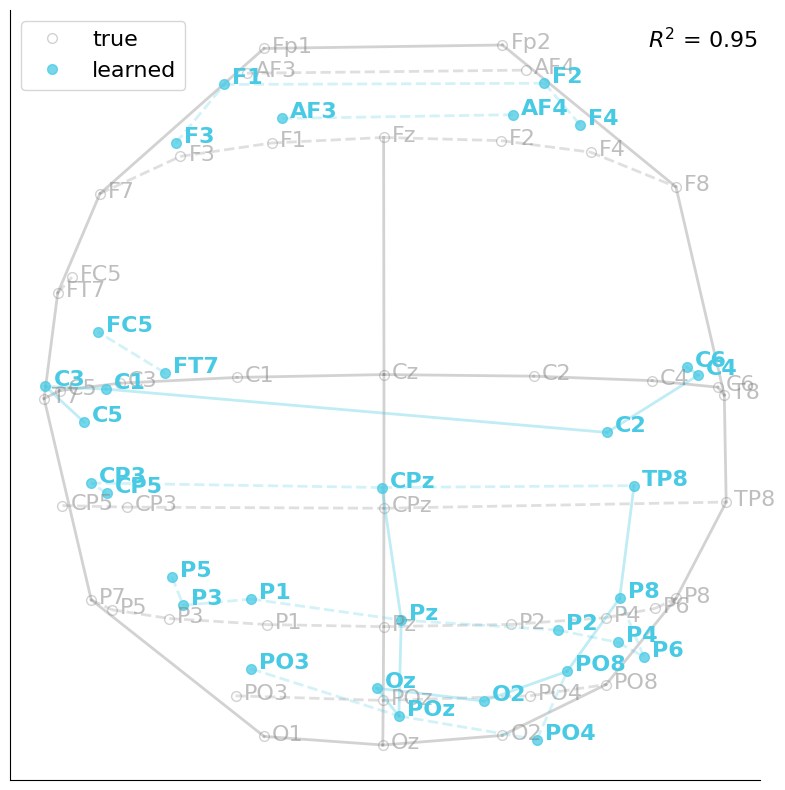

In [9]:
fig, axs = plt.subplots(1, 1, figsize=(8, 8))

plot_gt_points(axs, [gt_pos_1, gt_pos_2], [eeg_channel_names_1, eeg_channel_names_2])
plot_points_with_offset(axs, pos_2, gt_pos_2, eeg_channel_names_2, '#48cae4', arrows=False) #
axs.text(0.85, 0.95, r'${R^2}$ = ' + f'{r2_2:.2f}', transform=axs.transAxes, fontsize=16)
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
# axs.spines['left'].set_visible(False)
# axs.spines['bottom'].set_visible(False)
axs.legend(loc='upper left', fontsize=16)
# axs.set_xticklabels([])
# axs.set_yticklabels([])

axs.set_xticks([])
axs.set_yticks([])

fig.tight_layout()
plt.savefig('../figures/eeg_coords_2D_finetuning.pdf')
plt.savefig('../figures/eeg_coords_2D_finetuning.png', dpi=160)
plt.show()

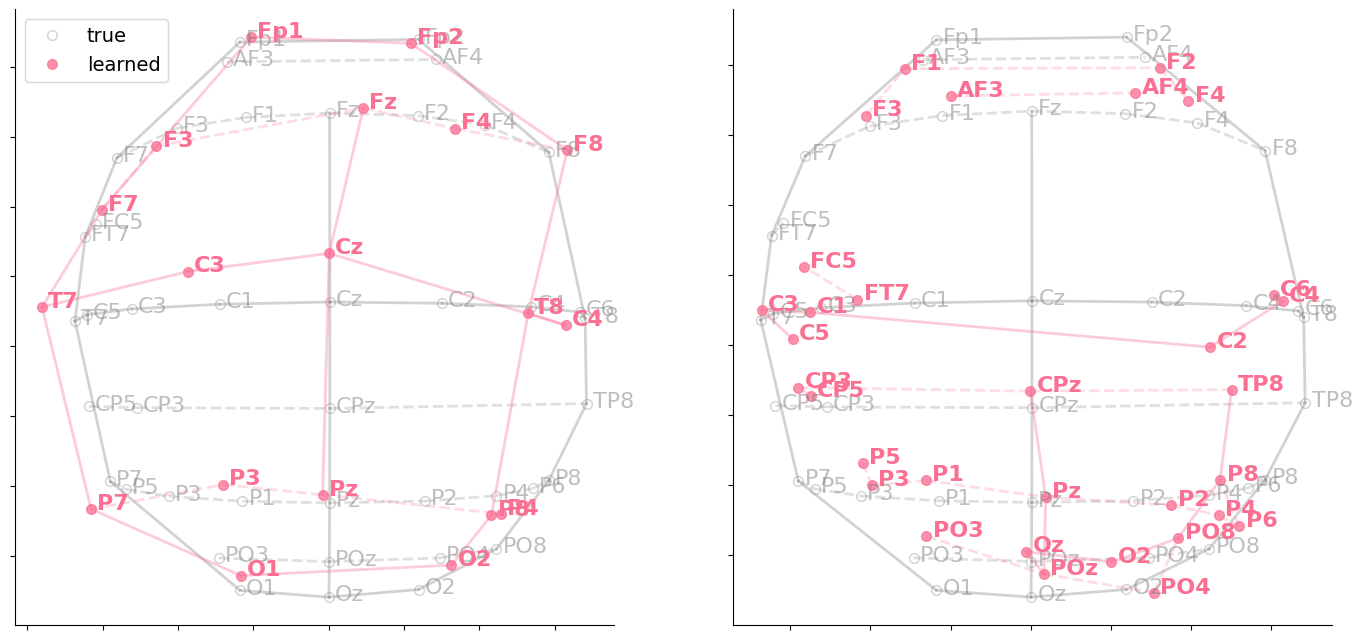

In [92]:
fig, axs = plt.subplots(1, 2, figsize=(17, 8))

plot_gt_points(axs[0], [gt_pos_1, gt_pos_2], [eeg_channel_names_1, eeg_channel_names_2])
plot_points_with_offset(axs[0], pos_1, gt_pos_1, eeg_channel_names_1, '#fb6f92', arrows=False)
# axs[0].text(0.05, 0.93, r'$\mathbf{R^2}$ = ' + f'{r2_1:.2f}', transform=axs[0].transAxes, fontsize=16, fontweight='bold')
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
# axs[0].spines['left'].set_visible(False)
# axs[0].spines['bottom'].set_visible(False)
axs[0].legend(loc='upper left', fontsize=14)
axs[0].set_xticklabels([])
axs[0].set_yticklabels([])


plot_gt_points(axs[1], [gt_pos_1, gt_pos_2], [eeg_channel_names_1, eeg_channel_names_2])
plot_points_with_offset(axs[1], pos_2, gt_pos_2, eeg_channel_names_2, '#fb6f92', arrows=False)
# axs[1].text(0.05, 0.93, r'$\mathbf{R^2}$ = ' + f'{r2_2:.2f}', transform=axs[1].transAxes, fontsize=16, fontweight='bold')
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
# axs[1].spines['left'].set_visible(False)
# axs[1].spines['bottom'].set_visible(False)
axs[1].set_xticklabels([])
axs[1].set_yticklabels([])


# fig.tight_layout()
# plt.savefig('../figures/eeg_coords_2d.pdf')
plt.show()

In [1]:
import os

from matplotlib.lines import Line2D
from matplotlib.patches import Polygon
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import numpy as np
from sympy import Plane, Point3D, Segment3D

In [15]:
ckpt_base = torch.load("/home/oturgut/otis/output/pre/otis/ticorp/multivariate/domain_specific/cos_weight0.0/ncc_weight0.1/seed0/baseDeep_dec160d4b/t1008/p1x24/wd0.1/m0.75/pre_b3744_blr3e-5/checkpoint-197-ncc-0.8818.pth", map_location="cpu")
ckpt_large = torch.load("/home/oturgut/otis/output/pre/otis/ticorp/multivariate/domain_specific/cos_weight0.0/ncc_weight0.1/seed0/largeDeep_dec160d4b/t1008/p1x24/wd0.15/m0.75/pre_b3680_blr1e-5/checkpoint-188-ncc-0.8919.pth", map_location="cpu")
ckpt_huge = torch.load("/home/oturgut/otis/output/pre/otis/ticorp/multivariate/domain_specific/cos_weight0.0/ncc_weight0.1/seed0/hugeDeep_dec160d4b/t1008/p1x24/wd0.05/m0.75/pre_b4320_blr3e-6/checkpoint-196-ncc-0.8827.pth", map_location="cpu")

new_ckpt_base = (ckpt_base["domain_offsets"], ckpt_base["model"]["pos_embed_y.weight"])
new_ckpt_large = (ckpt_large["domain_offsets"], ckpt_large["model"]["pos_embed_y.weight"])
new_ckpt_huge = (ckpt_huge["domain_offsets"], ckpt_huge["model"]["pos_embed_y.weight"])

In [16]:
root = "/home/oturgut/Documents/Paper/NeurIPS2024/Figures/scripts" # os.getcwd()

y, X = new_ckpt_base
# y, X = torch.load(os.path.join(root, 'baseDeep_pos_embed_y.pt'))

X = X[1:]  # remove pad token

In [1]:
y_name_by_index = {index: name for name, index in y.items()}
indices_sorted = sorted(y_name_by_index.keys())  

y_names = []
y_indices = []

prev_index = None
for index in indices_sorted:
    name = y_name_by_index[index]
    if prev_index is not None:
        y_names.extend([prev_name] * (index - prev_index))
        y_indices.extend(range(0, index - prev_index))
    prev_name = name
    prev_index = index
# add the last one
y_names.extend([prev_name] * (X.shape[0] - prev_index))
y_indices.extend(range(0, X.shape[0] - prev_index))


ecg_channel_names = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
eeg_channel_names = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz']
eeg_channel_names_2 = ['F3', 'F4', 'FC5', 'C3', 'C4', 'CP5', 'P3', 'Pz', 'P4', 'P8', 'Oz', 'O2', 'AF3', 'AF4', 'F1', 'F2', 'FT7', 'C5', 'C1', 'C2', 'C6', 'CP3', 'CPz', 'TP8', 'P5', 'P1', 'P2', 'P6', 'PO3', 'POz', 'PO4', 'PO8']

ecg_indices = [i for i, name in enumerate(y_names) if name == 'ecg']
eeg_indices = [i for i, name in enumerate(y_names) if name == 'eeg_10-20']
    
y_full_name = list(y_names)
for index, name in zip(ecg_indices, ecg_channel_names):
    y_full_name[index] = f'ECG: {name}'
for index, name in zip(eeg_indices, eeg_channel_names):
    y_full_name[index] = f'EEG: {name}'

name_clusters = []
names = list(set(y_names))
for name in names:
    indices = [i for i, n in enumerate(y_names) if n == name]
    name_clusters.append((name, indices))

X_clusters = []
for name, indices in name_clusters:
    X_cluster = X[indices].mean(dim=0)
    X_clusters.append(X_cluster)
X_clusters = torch.stack(X_clusters)

def plot_hierarchy(X, X_clusters, y_full_name, names):
    X = F.normalize(X, p=2, dim=1)
    sims = torch.matmul(X, X.T)
    mask = torch.eye(sims.shape[0], dtype=bool)
    sns.clustermap(sims, xticklabels=y_full_name, yticklabels=y_full_name, method='complete', cmap='coolwarm',  mask=mask.numpy())
    plt.show()

    X_clusters = F.normalize(X_clusters, p=2, dim=1)
    sims_cluster = torch.matmul(X_clusters, X_clusters.T)
    mask = torch.eye(sims_cluster.shape[0], dtype=bool)
    sns.clustermap(sims_cluster, xticklabels=names, yticklabels=names, method='complete', cmap='coolwarm', mask=mask.numpy())
    plt.show()

    from scipy.cluster.hierarchy import dendrogram, linkage
    Z = linkage(X, 'complete')  # ward, centroid, weighted, average, complete, single
    dn = dendrogram(Z, labels=y_full_name, orientation='left', show_contracted=False)
    plt.show()

    from scipy.cluster.hierarchy import dendrogram, linkage
    Z = linkage(X_clusters, 'complete')
    dn = dendrogram(Z, labels=names, orientation='left', show_contracted=False)
    plt.show()

def plot_all_2d(X, y_names, y_full_name):
    pca = PCA(n_components=2)
    components = pca.fit_transform(X)

    #components = components - components.min(axis=0)
    #components = components / components.max(axis=0)

    fig, ax = plt.subplots(figsize=(10, 10))
    sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=y_names, legend='full', palette='tab10', ax=ax, marker='o', s=50)
    
    # for i, txt in enumerate(y_full_name):
    #     ax.text(components[i, 0] + 0.01, components[i, 1] + 0.01, txt, fontsize=8, c='black')

    plt.xticks([])
    plt.yticks([])
    plt.show()

def plot_all_2d(X, y_names, y_full_name):
    color_map = {}
    for i, s in enumerate(set(y_names)):
        color_map[s] = plt.cm.tab10(i / len(set(y_names)))
    
    pca = PCA(n_components=2)
    components = pca.fit_transform(X)

    fig, ax = plt.subplots(figsize=(10, 10))
    
    colors = [color_map[s] for s in sorted(list(set(y_names)))]
    # colors = ["#001219", "#005f73", "#0a9396", "#94d2bd", "#e9d8a6", "#ee9b00", "#ca6702", "#bb3e03", "#ae2012", "#9b2226"]
    # colors = ["#001219", "#005f73", "#0a9396", "#94d2bd", "#e9d8a6", "#ee9b00", "#ca6702", "#bb3e03", "#ae2012", "#9b2226"]
    upper_bnd = 0
    for id, domain in enumerate(sorted(list(set(y_names)))):
        lower_bnd = upper_bnd
        for name in y_names:
            if name == domain:
                upper_bnd += 1
        
        ax.scatter(components[lower_bnd:upper_bnd, 0], components[lower_bnd:upper_bnd, 1], c=colors[id], label=domain, marker='o', s=75) #, cmap='Set1')
    # ax.legend()

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.xticks([])
    plt.yticks([])

    # plt.savefig("../figures/embeddings_2D_wo_legend.pdf")

    plt.show()

def plot_all_3d(X, y_names, y_full_name, azim=270, elev=15):
    color_map = {}
    for i, s in enumerate(set(y_names)):
        color_map[s] = plt.cm.tab10(i / len(set(y_names)))

    # Convert the list of strings to a list of colors
    colors = [color_map[s] for s in y_names]
    pca = PCA(n_components=3)
    components = pca.fit_transform(X)
    components = components - components.min(axis=0) + 0.1

    ax = plt.figure(figsize=(10, 10)).add_subplot(projection='3d')

    stem =  ax.stem(components[:, 0], components[:, 1], components[:, 2],
            basefmt=" ", markerfmt=" ", linefmt='--')
    plt.setp(stem[1], alpha=0.7)
    plt.setp(stem[1], color='grey')

    # ax.scatter(components[:, 0], components[:, 1], components[:, 2], c=colors, marker='o', s=50, cmap='Set1')
    # ax.legend()

    # for i, txt in enumerate(y_full_name):
    #     ax.text(components[i, 0] + 0.01, components[i, 1] + 0.01, components[i, 2] + 0.05, txt, fontsize=6, c='black', fontweight='bold', zorder=100)

    colors = [color_map[s] for s in sorted(list(set(y_names)))]
    upper_bnd = 0
    for id, domain in enumerate(sorted(list(set(y_names)))):
        lower_bnd = upper_bnd
        for name in y_names:
            if name == domain:
                upper_bnd += 1
        
        ax.scatter(components[lower_bnd:upper_bnd, 0], components[lower_bnd:upper_bnd, 1], components[lower_bnd:upper_bnd, 2], c=colors[id], label=domain, marker='o', s=50, cmap='Set1')
    # ax.legend(loc="center right")
    ax.legend(loc=(0.675, 0.5))
    # ax.legend(loc=(0.715, 0.575))

    ax.azim = azim
    ax.elev = elev
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])

    # plt.savefig("../figures/embeddings_3D.pdf")

    plt.show()

def plot_ecg_3d(X, y_names, azim=270, elev=15):
    X_ecg = X[ecg_indices]
    
    pca = PCA(n_components=3)
    components_ecg = pca.fit_transform(X_ecg)
    components_ecg = components_ecg - components_ecg.min(axis=0) + 0.1
    #components_ecg[:, 0:2] = - components_ecg[:, 0:2]

    ax = plt.figure(figsize=(10, 10)).add_subplot(projection='3d')

    stem =  ax.stem(components_ecg[:, 0], components_ecg[:, 1], components_ecg[:, 2],
            basefmt=" ", markerfmt=" ", linefmt='--')
    plt.setp(stem[1], alpha=0.7)
    plt.setp(stem[1], color='grey')
    ax.scatter(components_ecg[:, 0], components_ecg[:, 1], components_ecg[:, 2], marker='o', s=50)

    from mpl_toolkits.mplot3d import Axes3D
    from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3D

    ax.add_collection(Poly3DCollection([components_ecg[:3]], facecolors='#c1121f', linewidths=1, edgecolors='k', alpha=.9))
    ax.add_collection(Poly3DCollection([components_ecg[3:6]], facecolors='#fdf0d5', linewidths=1, edgecolors='k', alpha=.9))
    
    for i in range(6, len(components_ecg) - 1):
        ax.add_line(Line3D([components_ecg[i][0], components_ecg[i+1][0]], [components_ecg[i][1], components_ecg[i+1][1]], [components_ecg[i][2], components_ecg[i+1][2]], 
                           lw=2, c='#003049')) 

    for i, txt in enumerate(ecg_channel_names):
        ax.text(components_ecg[i, 0] + 0.02, components_ecg[i, 1] + 0.02, components_ecg[i, 2] + 0.02, txt, fontsize=12, fontweight='bold', c='black', zorder=100)
    
    # no axis labels
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    ax.azim = azim
    #ax.dist = 5
    ax.elev = elev

    plt.tight_layout()
    # plt.savefig('../figures/ecg_coords_3d.pdf')
    # plt.savefig('../figures/ecg_coords_3d.png', transparent="True")
    plt.show()

def plot_ecg_2d(X, y_names):
    ecg_indices = [i for i, name in enumerate(y_names) if name == 'ecg']
    X_ecg = X[ecg_indices]
    pca = PCA(n_components=2)
    components_ecg = pca.fit_transform(X_ecg)

    fig, ax = plt.subplots()
    def plot_line(ax, points, c):
        for i in range(len(points) - 1):
            ax.add_line(Line2D([points[i][0], points[i + 1][0]], [points[i][1], points[i + 1][1]], lw=2, c=c))

    plot_line(ax, [*components_ecg[:3], components_ecg[0]], 'tab:red')
    plot_line(ax, [*components_ecg[3:6], components_ecg[3]], 'tab:green')
    plot_line(ax, components_ecg[6:], 'tab:blue')

    ax.plot(components_ecg[:, 0], components_ecg[:, 1], 'o')
    for i, txt in enumerate(ecg_channel_names):
        plt.annotate(txt, (components_ecg[i, 0], components_ecg[i, 1]))
    
    plt.xticks([])
    plt.yticks([])
    plt.show()

def plot_eeg_both_2d():
    # y_2, X_2 = torch.load('/Users/philip/Documents/AI_for_Med/projects/otis/baseDeep_multi_pos_embed_y.pt')
    y_2, X_2 = torch.load(os.path.join(root, 'baseDeep_multi_pos_embed_y.pt'))
    X_eeg_2 = X_2[1:]  # remove pad token
    assert len(eeg_channel_names_2) == X_eeg_2.shape[0]

    X_eeg = X[eeg_indices]
    X_eeg_all = torch.cat((X_eeg, X_eeg_2), dim=0)
    pca = PCA(n_components=2)
    components_eeg_all = pca.fit_transform(X_eeg_all)
    components_eeg = components_eeg_all[:len(eeg_channel_names)]
    components_eeg_2 = components_eeg_all[len(eeg_channel_names):]

    fig, ax = plt.subplots()
    ax.plot(components_eeg[:, 0], components_eeg[:, 1], 'o', c='tab:blue')
    ax.plot(components_eeg_2[:, 0], components_eeg_2[:, 1], 'o', c='tab:red')

    for i, txt in enumerate(eeg_channel_names):
        ax.annotate(txt, (components_eeg[i, 0], components_eeg[i, 1]), c='tab:blue', fontsize=8)

    for i, txt in enumerate(eeg_channel_names_2):
        ax.annotate(txt, (components_eeg_2[i, 0], components_eeg_2[i, 1]), c='tab:red', fontsize=8)

    plt.xticks([])
    plt.yticks([])
    plt.show()

def plot_eeg_2d(X, y_names):
    X_eeg = X[eeg_indices]
    
    pca = PCA(n_components=2)
    components_eeg = pca.fit_transform(X_eeg)

    fig, ax = plt.subplots()
    ax.plot(components_eeg[:, 0], components_eeg[:, 1], 'o')
    for i, txt in enumerate(eeg_channel_names):
        ax.annotate(txt, (components_eeg[i, 0], components_eeg[i, 1]))

    Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T7, T8, P7, P8, Fz, Cz, Pz = components_eeg
    vline = [Fz, Cz, Pz]
    hline = [T7, C3, Cz, C4, T8]
    circle_line = [O2, P8, T8, F8, Fp2, Fp1, F7, T7, P7, O1, O2]
    hline_p = [P7, P3, Pz, P4, P8]
    hline_f = [F7, F3, Fz, F4, F8]

    def plot_line(ax, points, c):
        for i in range(len(points) - 1):
            ax.add_line(Line2D([points[i][0], points[i + 1][0]], [points[i][1], points[i + 1][1]], lw=1, c=c))

    plot_line(ax, vline, 'black')
    plot_line(ax, hline, 'black')
    plot_line(ax, circle_line, 'black')
    plot_line(ax, hline_p, 'grey')
    plot_line(ax, hline_f, 'grey')
   
    plt.xticks([])
    plt.yticks([])
    plt.show()

def plot_eeg_3d(X, y_names, azim=270, elev=15):
    X_eeg = X[eeg_indices]
    
    pca = PCA(n_components=3)
    components_eeg = pca.fit_transform(X_eeg)

    ax = plt.figure(figsize=(10, 10)).add_subplot(projection='3d')
    
    Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T7, T8, P7, P8, Fz, Cz, Pz = components_eeg
    vline = [Fz, Cz, Pz]
    hline = [T7, C3, Cz, C4, T8]
    circle_line = [O2, P8, T8, F8, Fp2, Fp1, F7, T7, P7, O1, O2]
    hline_p = [P7, P3, Pz, P4, P8]
    hline_f = [F7, F3, Fz, F4, F8]

    from mpl_toolkits.mplot3d.art3d import Line3D
    from mpl_toolkits.mplot3d.art3d import Poly3DCollection
    def plot_line(ax, points, c, linestyle='solid'):
        for i in range(len(points) - 1):
            ax.add_line(Line3D([points[i][0], points[i + 1][0]], [points[i][1], points[i + 1][1]], [points[i][2], points[i + 1][2]], lw=2, c=c, linestyle=linestyle))

    #ax.add_collection(Poly3DCollection([[P7, P3, Pz, P4, P8], [T7, C3, Cz, C4, T8], [F7, F3, Fz, F4, F8]], 
    #                                   facecolors='red', edgecolors='black', linewidths=0.5, alpha=.1))

    ax.add_collection(Poly3DCollection([[O1, O2, Pz], [P7, O1, P3], [O1, P3, Pz], [P8, O2, P4], [O2, P4, Pz],
                                        [T7, P7, C3], [P3, P7, C3], [C3, P3, Pz], [C3, Pz, Cz],
                                        [T8, P8, C4], [P4, P8, C4], [C4, P4, Pz], [C4, Pz, Cz],
                                        [T7, F7, C3], [F7, F3, C3], [F3, Fz, C3], [C3, Cz, Fz],
                                        [T8, F8, C4], [F8, F4, C4], [F4, Fz, C4], [C4, Cz, Fz],
                                        [F7, F3, Fp1], [F3, Fp1, Fz], 
                                        [F8, F4, Fp2], [F4, Fp2, Fz],[Fp1, Fz, Fp2],
                                        ], 
                                       facecolors='grey', edgecolors='darkgrey', linewidths=0.5, alpha=.25))
    

    plot_line(ax, vline, 'blue')
    plot_line(ax, hline, 'green')
    plot_line(ax, circle_line, 'black')
    plot_line(ax, hline_p, 'grey', linestyle='dashed')
    plot_line(ax, hline_f, 'grey', linestyle='dashed')
   
    ax.scatter(components_eeg[:, 0], components_eeg[:, 1], components_eeg[:, 2], marker='o', s=50)

    for i, txt in enumerate(eeg_channel_names):
        ax.text(components_eeg[i, 0], components_eeg[i, 1], components_eeg[i, 2], txt, fontsize=12, fontweight='bold', c='black')

    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    ax.azim = azim
    ax.elev = elev
    plt.show()

NameError: name 'y' is not defined

/tmp/ipykernel_832358/4223768478.py:202: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


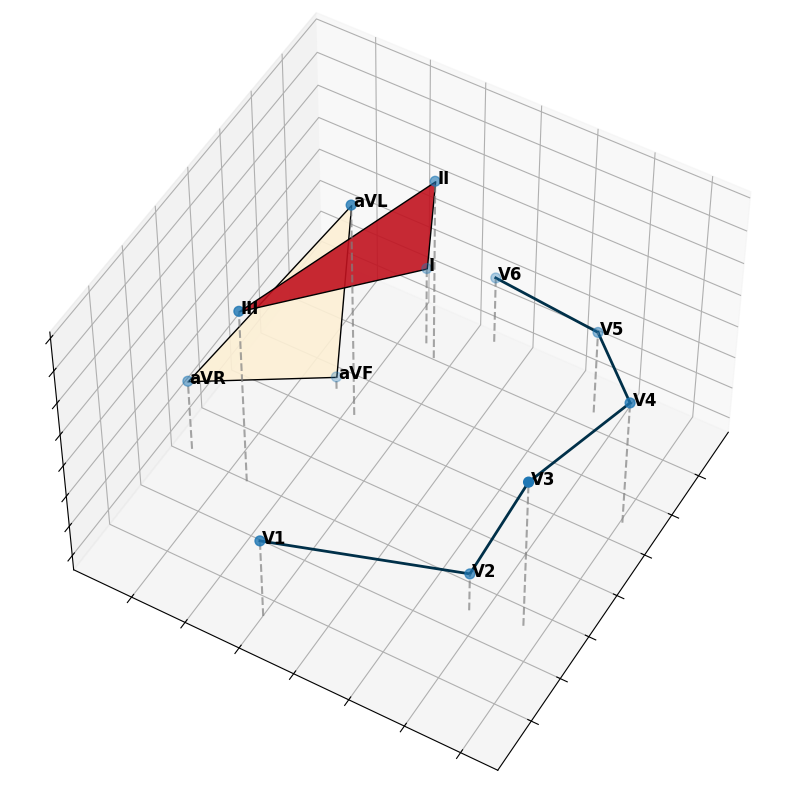

In [28]:
# plot_ecg_3d(X, y_names, azim=30, elev=80) # diese im paper - top
# plot_ecg_3d(X, y_names, azim=10, elev=0) # diese im paper - side
plot_ecg_3d(X, y_names, azim=30, elev=50) # diese im paper

/tmp/ipykernel_843711/2550120973.py:105: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(components[lower_bnd:upper_bnd, 0], components[lower_bnd:upper_bnd, 1], c=colors[id], label=domain, marker='o', s=75) #, cmap='Set1')


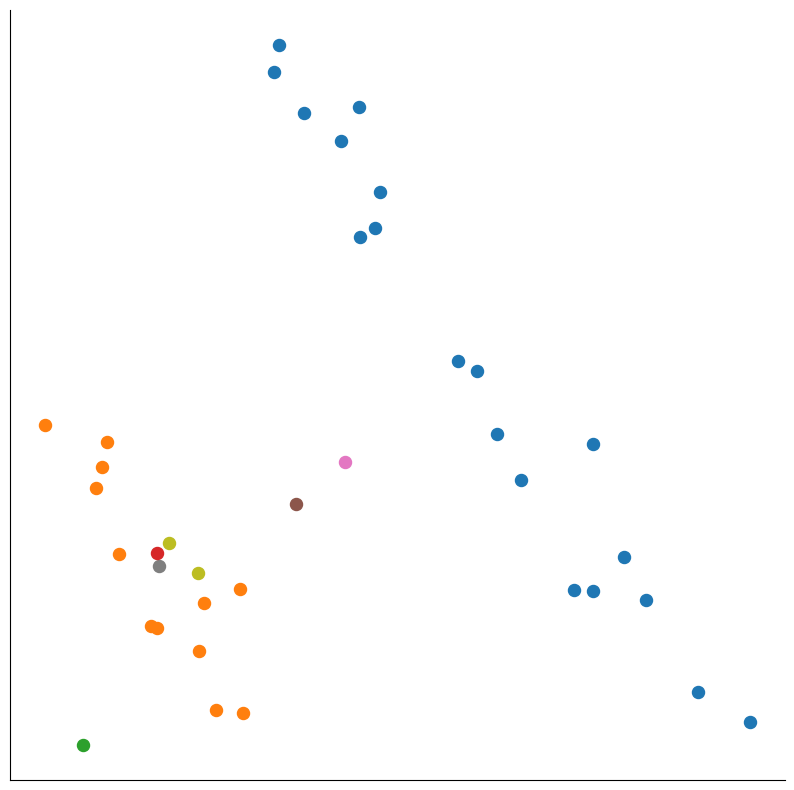

In [26]:
# plot_eeg_2d(X, y_names)
# plot_eeg_both_2d()
# plot_ecg_2d(X, y_names)
# plot_ecg_3d(X, y_names, azim=265, elev=15)
# plot_ecg_3d(X, y_names, azim=270, elev=70)
# plot_ecg_3d(X, y_names, azim=270, elev=0)
# plot_ecg_3d(X, y_names, azim=270, elev=90)
# plot_ecg_3d(X, y_names, azim=30, elev=80) # diese im paper - top
# plot_ecg_3d(X, y_names, azim=10, elev=0) # diese im paper - side
# plot_ecg_3d(X, y_names, azim=30, elev=15)
# plot_ecg_3d(X, y_names, azim=30, elev=50) # diese im paper
# plot_eeg_3d(X, y_names, azim=-45, elev=70)
# plot_eeg_3d(X, y_names, azim=-45, elev=40)
# plot_hierarchy(X, X_clusters, y_full_name, names)
plt.rcParams.update({'font.size': 17})
plot_all_2d(X, y_names, y_full_name)
# plot_all_3d(X, y_names, y_full_name, azim=110, elev=75)
# plot_all_3d(X, y_names, y_full_name, azim=90, elev=15)
# plot_all_3d(X, y_names, y_full_name, azim=180, elev=90)

/tmp/ipykernel_843711/3585715740.py:150: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(components[lower_bnd:upper_bnd, 0], components[lower_bnd:upper_bnd, 1], components[lower_bnd:upper_bnd, 2], c=colors[id], label=domain, marker='o', s=50, cmap='Set1')
/tmp/ipykernel_843711/3585715740.py:150: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(components[lower_bnd:upper_bnd, 0], components[lower_bnd:upper_bnd, 1], components[lower_bnd:upper_bnd, 2], c=colors[id], label=domain, marker='o', s=50, cmap='Set1')


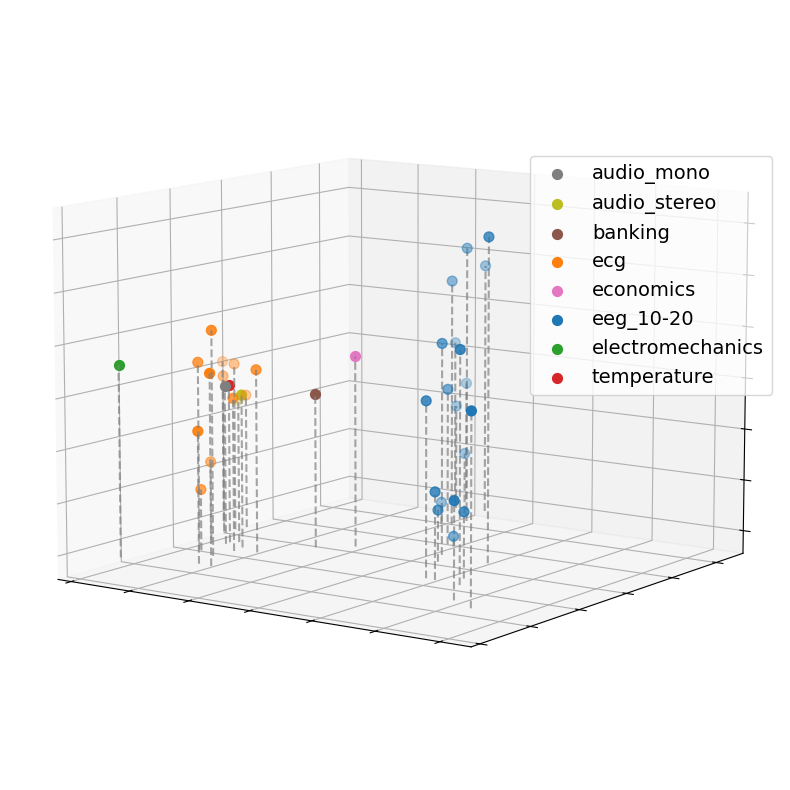

In [35]:
plt.rcParams.update({'font.size': 14})
plot_all_3d(X, y_names, y_full_name, azim=305, elev=10)